# Statistical Machine Learning  : Algorithms & Evaluation

# Individual Project - Submitted by Noor Ayesha

# IESEG SCHOOL OF BUSINESS

### Libraries

In [22]:
import sys

import seaborn as sns
import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)
import sidetable
#import dtale

#Loading the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# For computing the scores etc
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss

In [23]:
#!pip install sidetable

In [24]:
# Import the libraries
import os
import matplotlib
matplotlib.use(u'nbAgg')
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [25]:
#!pip install catboost
#!pip install xgboost

In [26]:
#!pip install sidetable

### Paths

In [27]:
directory = r"C:\IESEG_CLASSES_Noor\semester2\SML"
inputData = directory + "/Data"
sandbox   = directory + "/Sandbox"

### Import Data

#### 1. Read csv

In [28]:
data = pd.read_csv(inputData + ".//bank_mkt_train.csv")

#### 2.inspect csv

In [29]:
data.head(3)

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0


In [30]:
#Check Overview of the data table
def dataoveriew(data, message):
    print(f'{message}:\n')
    print('Number of rows: ', data.shape[0])
    print("\nNumber of features:", data.shape[1])
    print("\nData Features:")
    print(data.columns.tolist())
    print("\nMissing values:", data.isnull().sum().values.sum())
    print("\nUnique values:")
    print(data.nunique())
    
dataoveriew(data, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  20000

Number of features: 21

Data Features:
['client_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe']

Missing values: 3664

Unique values:
client_id         20000
age                  77
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
campaign             40
pdays                25
previous              7
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           300
nr.employed          11
subscribe             2
dtype: int64


In [31]:
#Check for missing values percentile
data.stb.missing(style=True)

,missing,total,percent
loan,219,"20,000",1.09%
contact,217,"20,000",1.08%
default,214,"20,000",1.07%
previous,209,"20,000",1.04%
euribor3m,204,"20,000",1.02%
campaign,203,"20,000",1.01%
age,202,"20,000",1.01%
month,199,"20,000",1.00%
marital,199,"20,000",1.00%
cons.conf.idx,197,"20,000",0.98%


In [32]:
#total of duplicated rows in our dataset
print('total of duplicated rows in our dataset: {}'.format(data.duplicated().sum()))

total of duplicated rows in our dataset: 0


In [33]:
data[['poutcome','subscribe']].groupby(['subscribe']).count()

,poutcome
subscribe,
0,17569
1,2256


In [34]:
print(data["subscribe"].value_counts())

0    17729
1     2271
Name: subscribe, dtype: int64


## Exploratory Data Analysis

### Distribution of Class variable

<IPython.core.display.Javascript object>


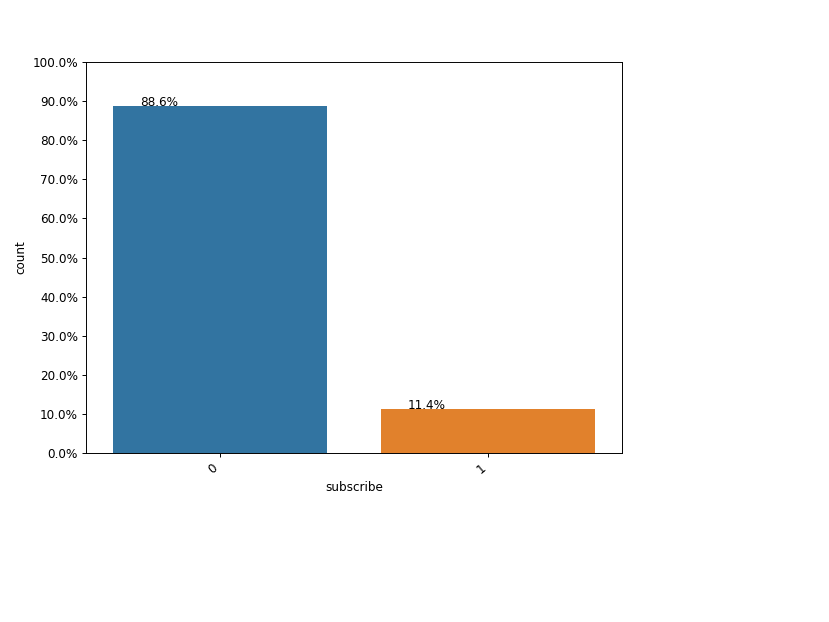

In [35]:
plt.figure(figsize=(8,6))
Y = data["subscribe"]
total = len(Y)*1.
ax=sns.countplot(x="subscribe", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

### Univariate Analysis


In [36]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

In [37]:
%matplotlib inline
def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="subscribe")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

### Feature: Job (Categorical variable)

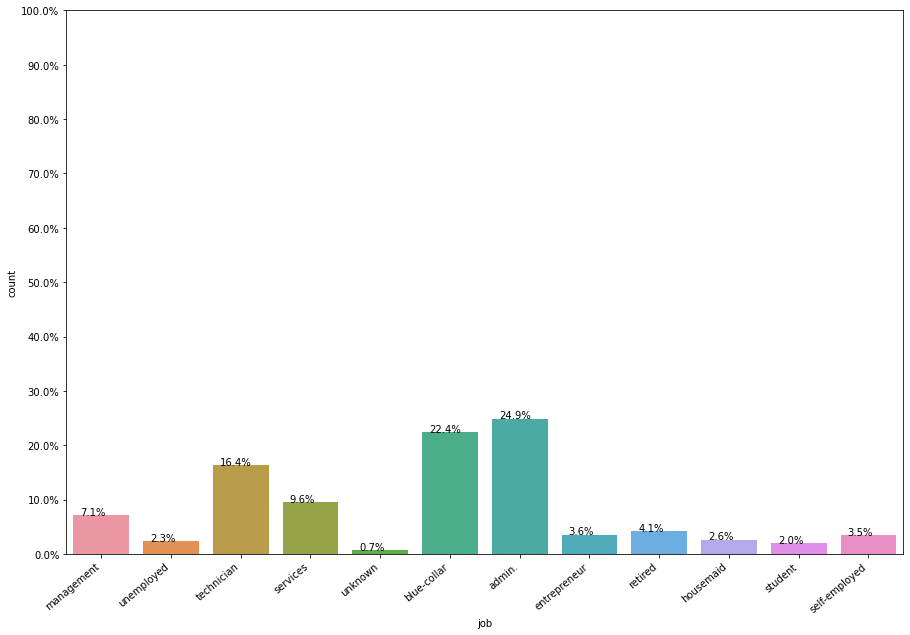

In [38]:
countplot("job", data)

From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting
thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have
subscribed a term deposit

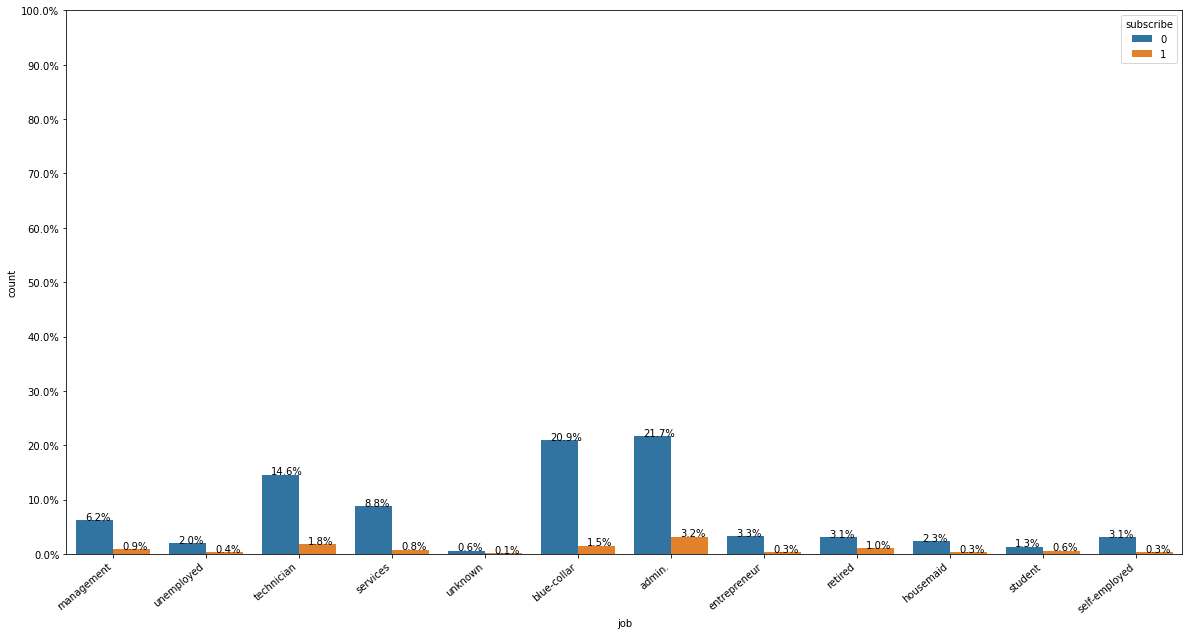

In [39]:
countplot_withY("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but
they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than
any other profession.
We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the
highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.


### Feature: Marital (Categorical feature)

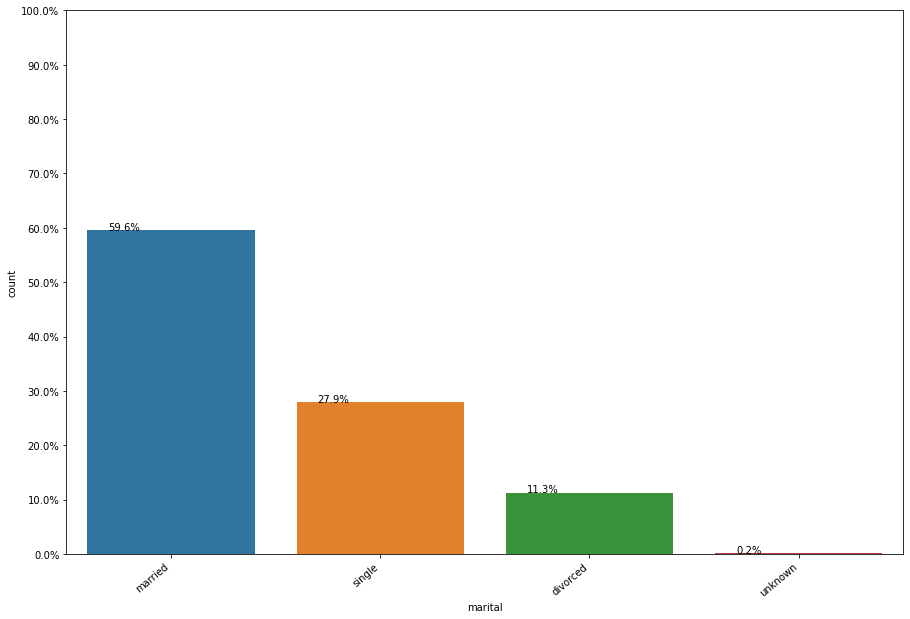

In [40]:
countplot("marital", data)

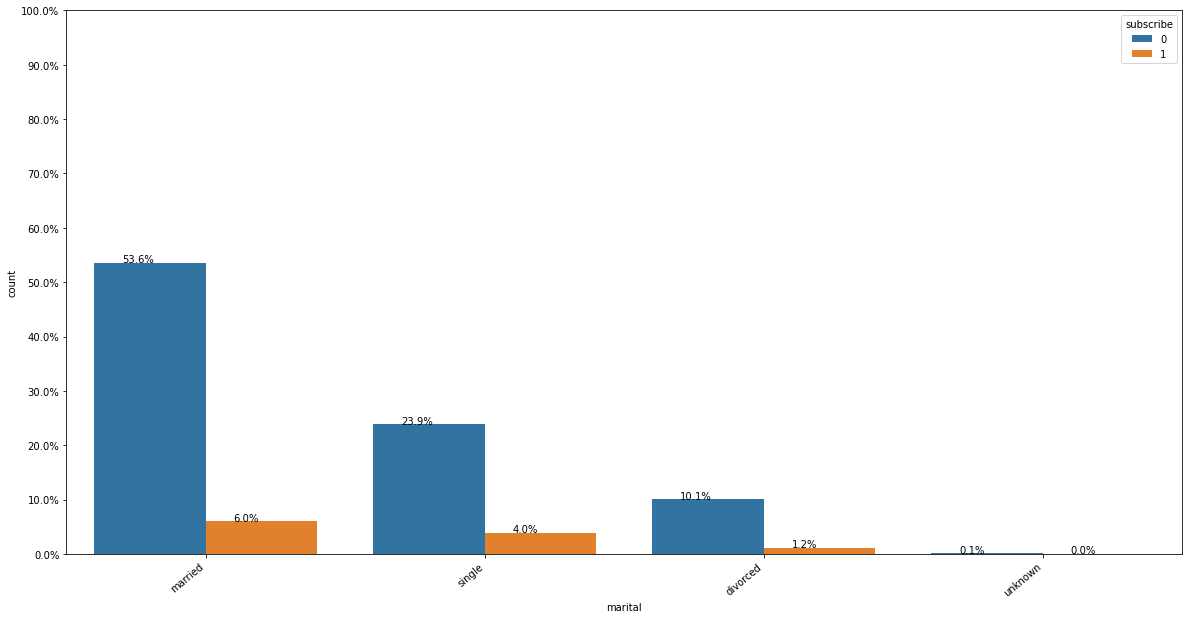

In [41]:
countplot_withY("marital",data)

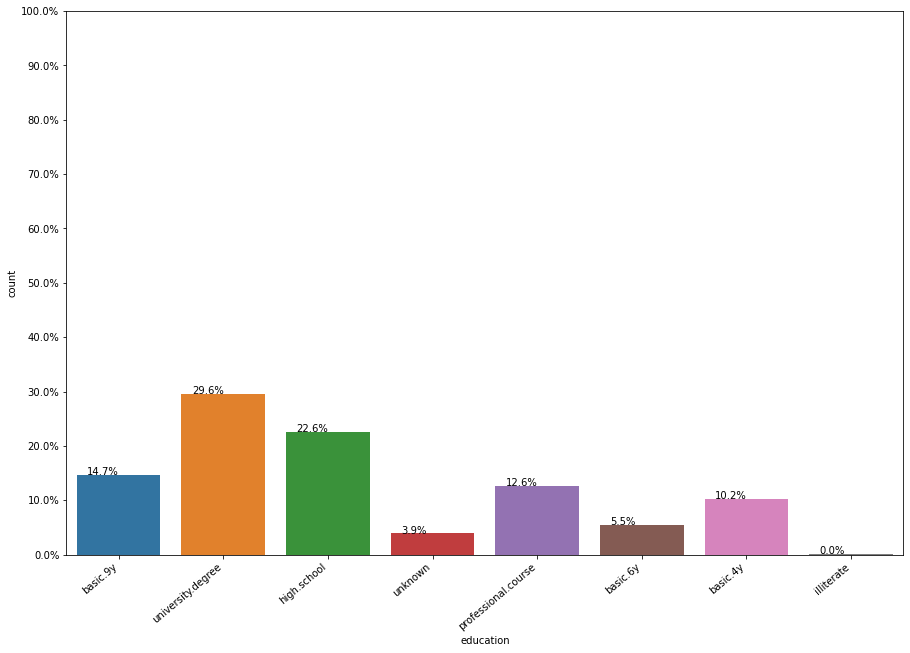

In [42]:
countplot("education",data)

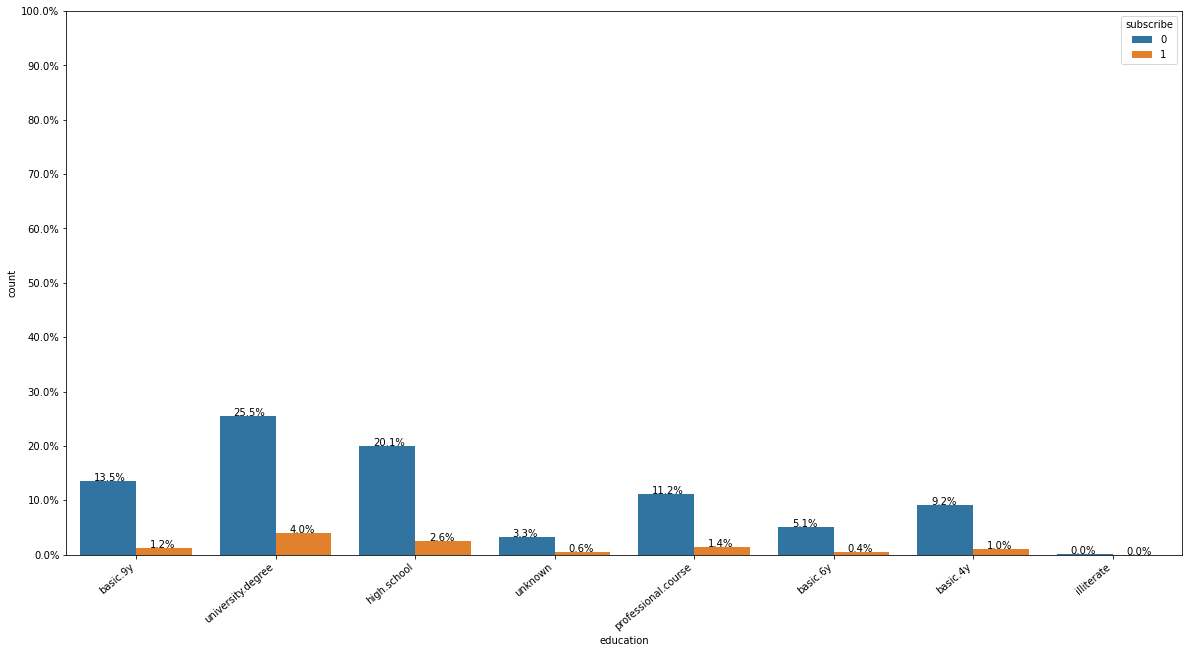

In [43]:
countplot_withY("education",data)

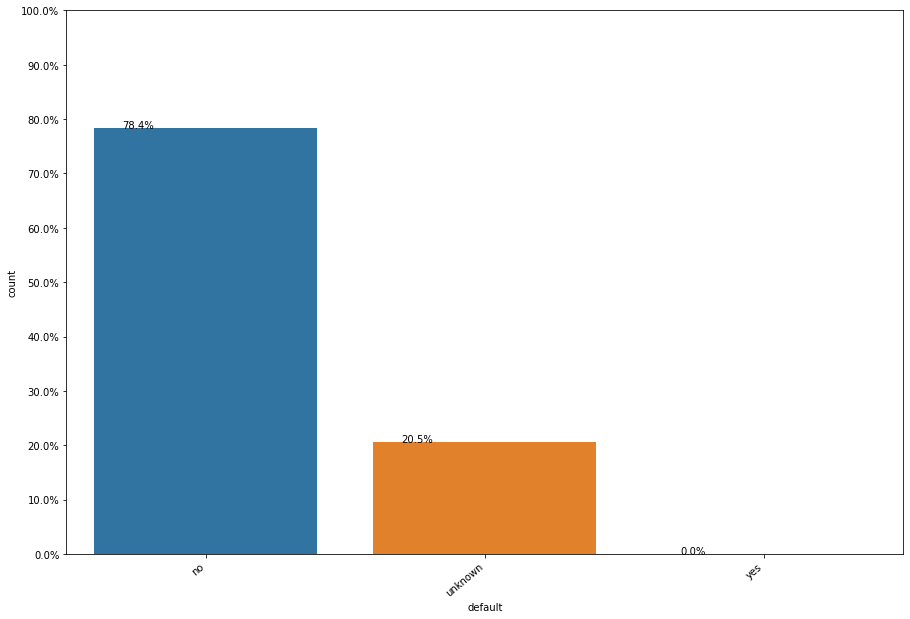

In [44]:
countplot("default",data)

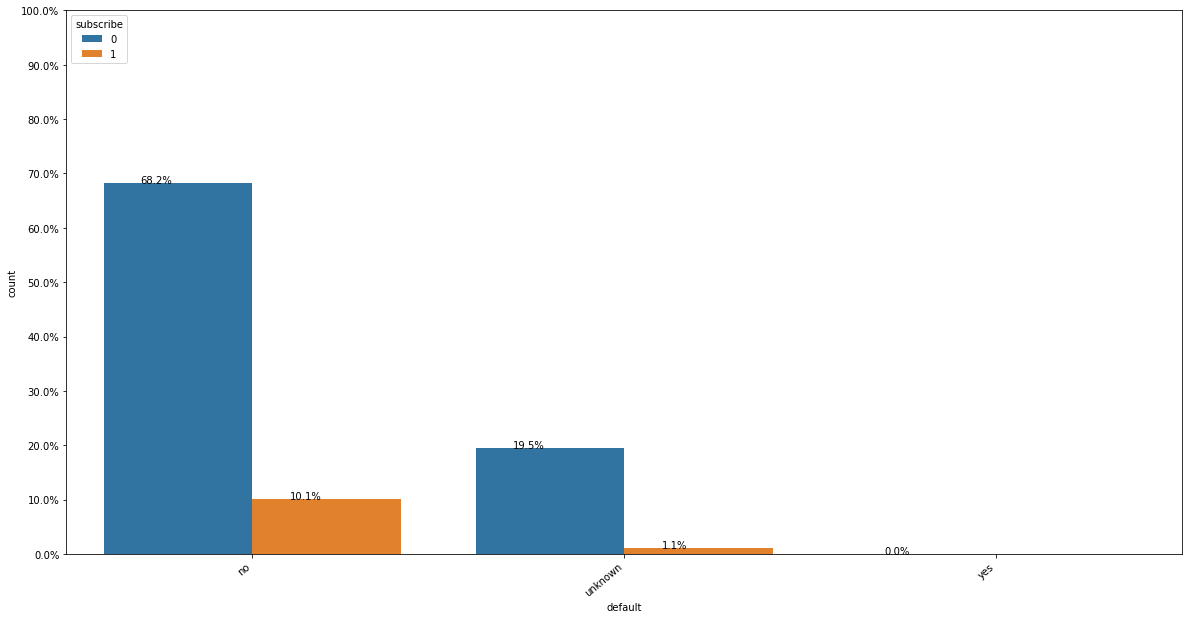

In [45]:
countplot_withY("default",data)

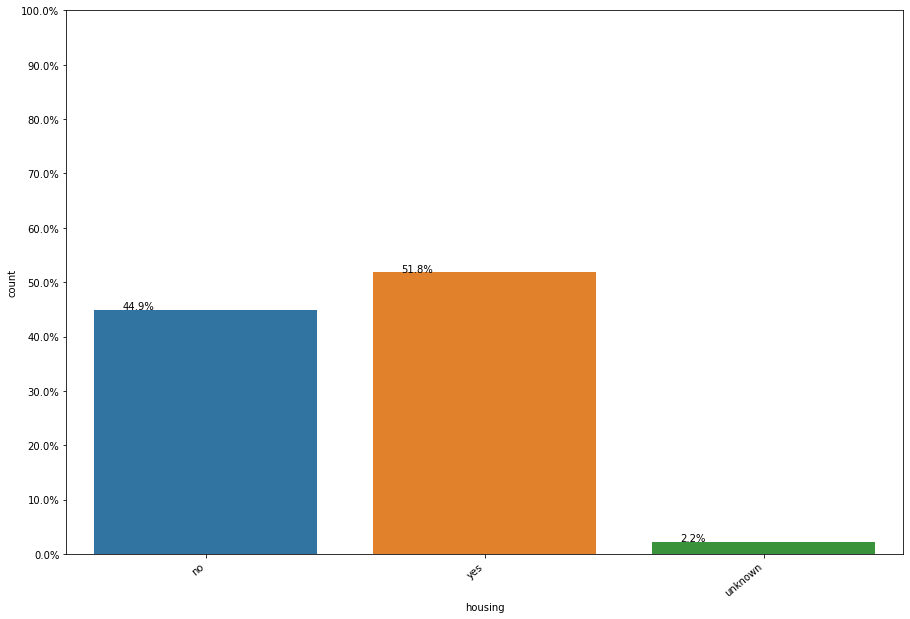

In [46]:
countplot("housing",data)

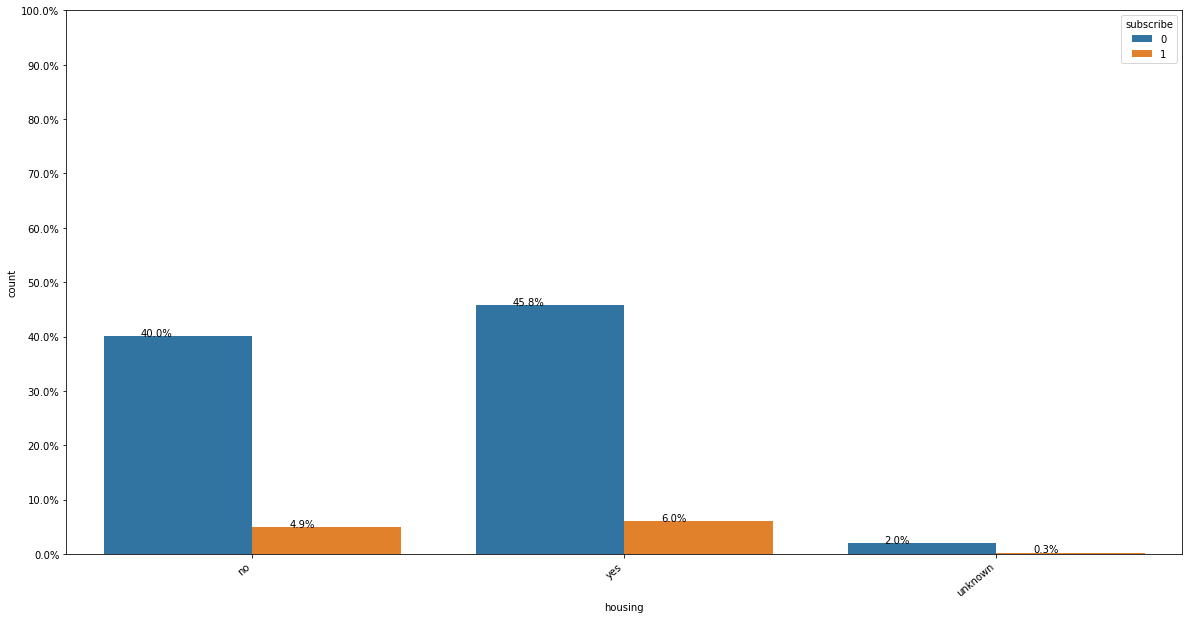

In [47]:
countplot_withY("housing",data)

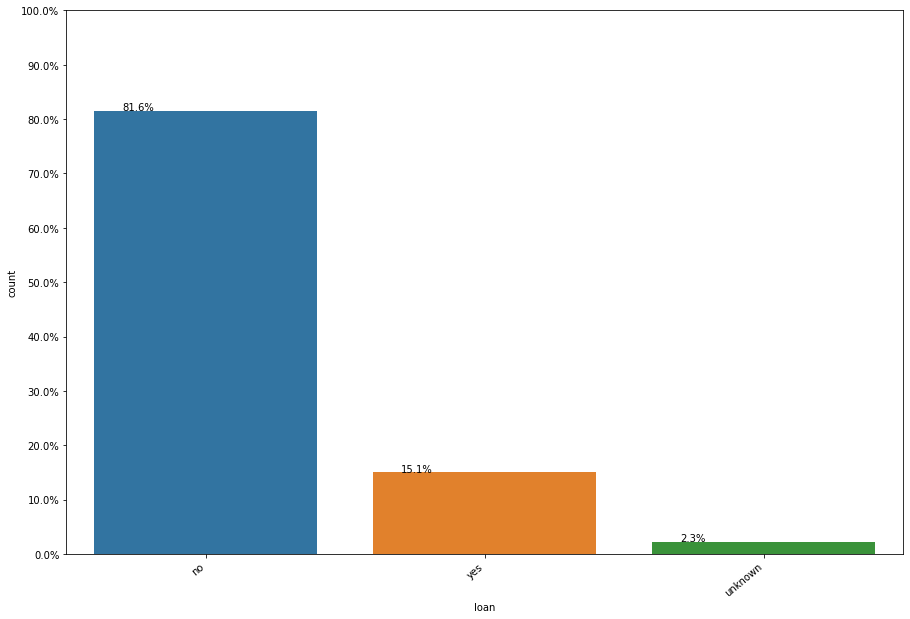

In [48]:
countplot("loan",data)

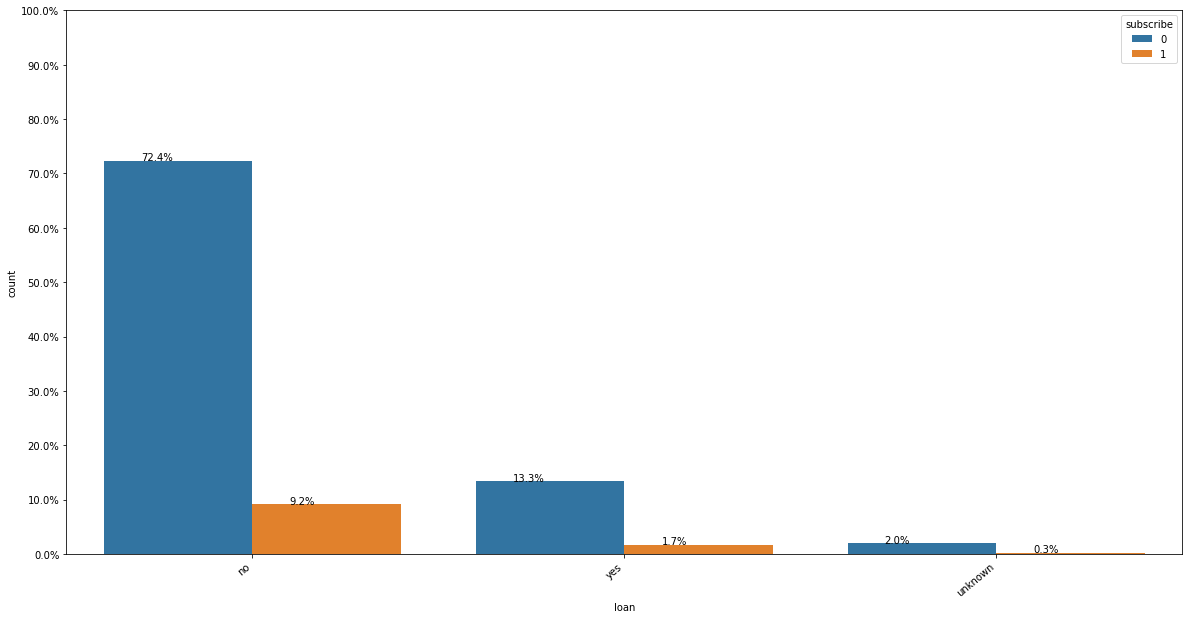

In [49]:
countplot_withY("loan",data)

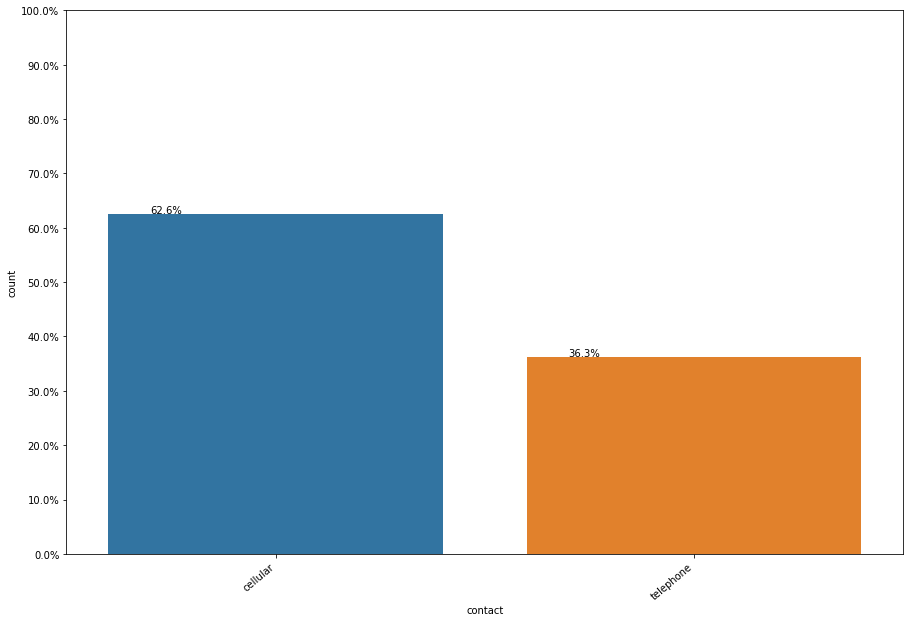

In [50]:
countplot("contact",data)

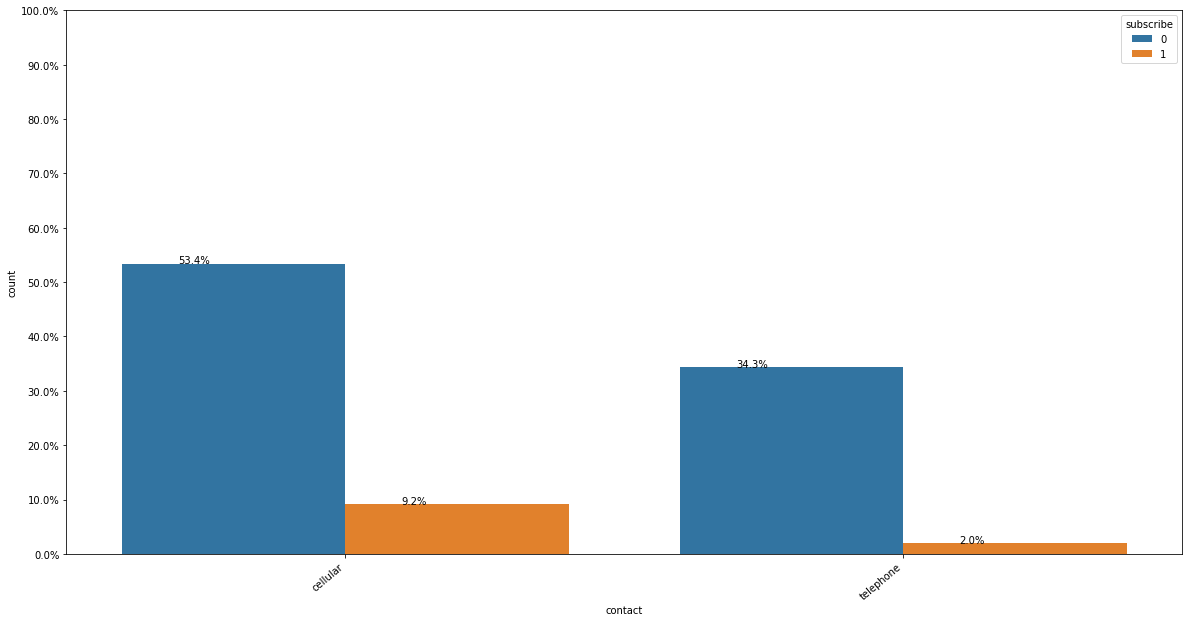

In [51]:
countplot_withY("contact",data)

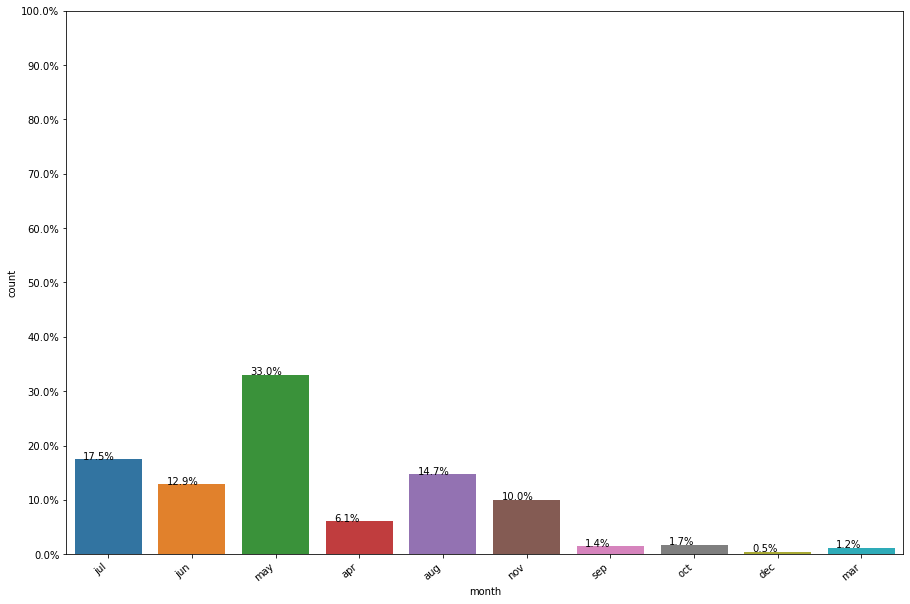

In [52]:
countplot("month",data)

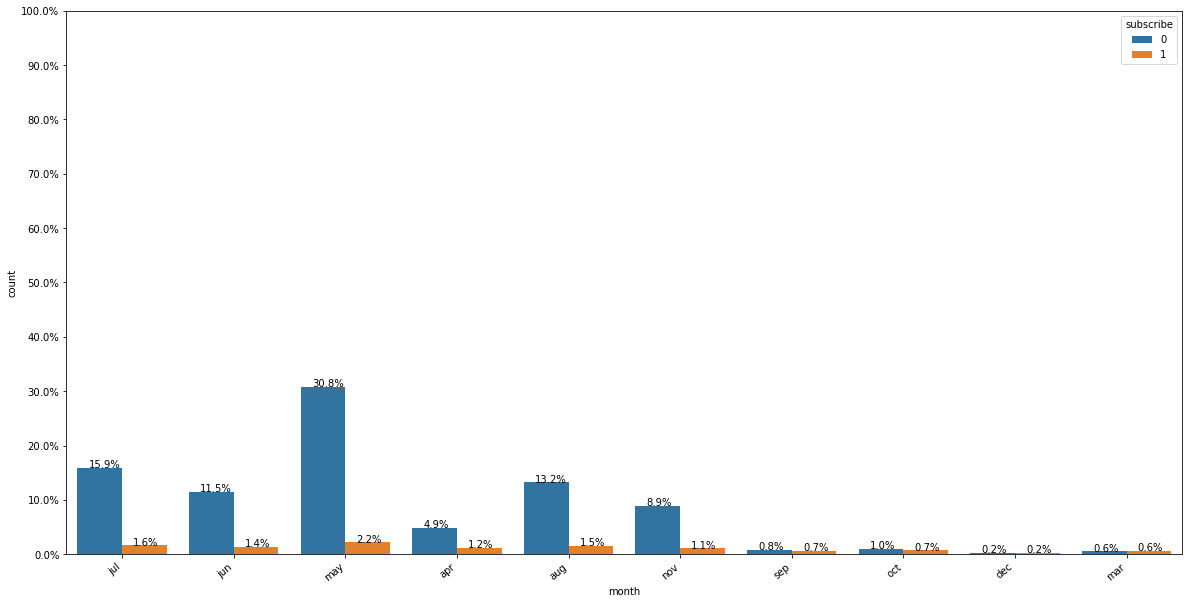

In [53]:
countplot_withY("month",data)

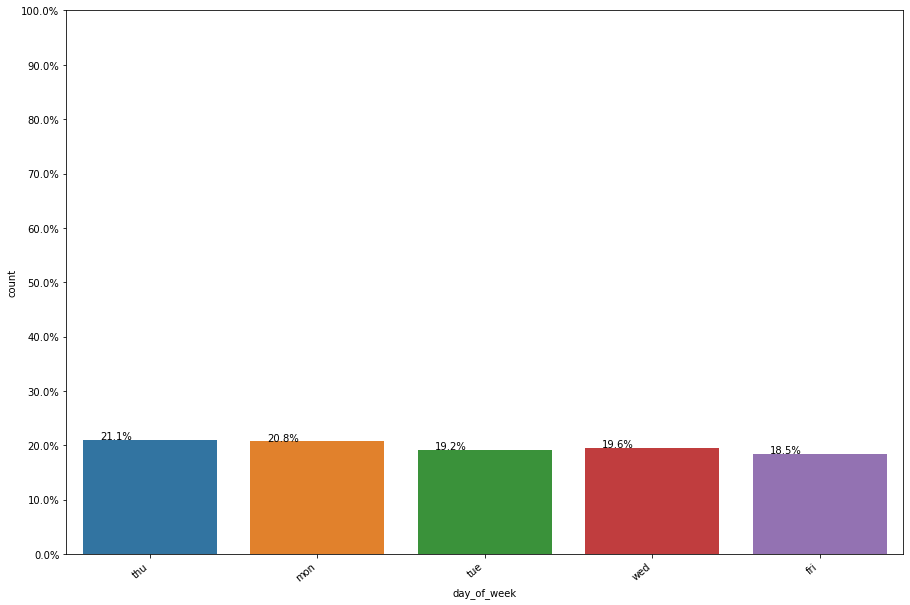

In [54]:
countplot("day_of_week",data)

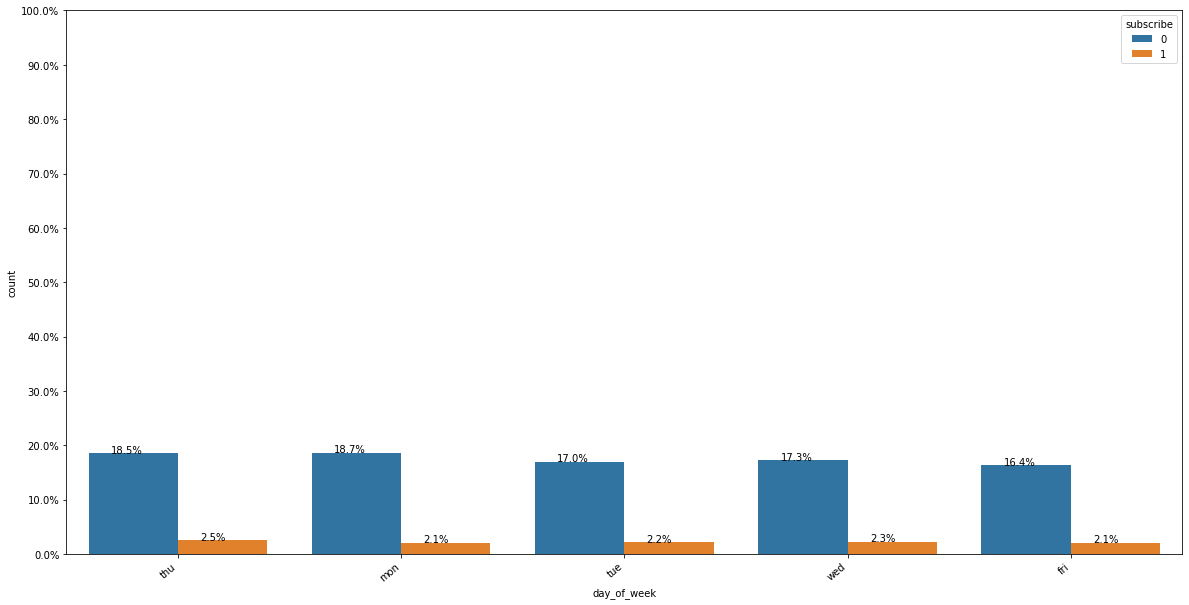

In [55]:
countplot_withY("day_of_week",data)

The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also
almost same.


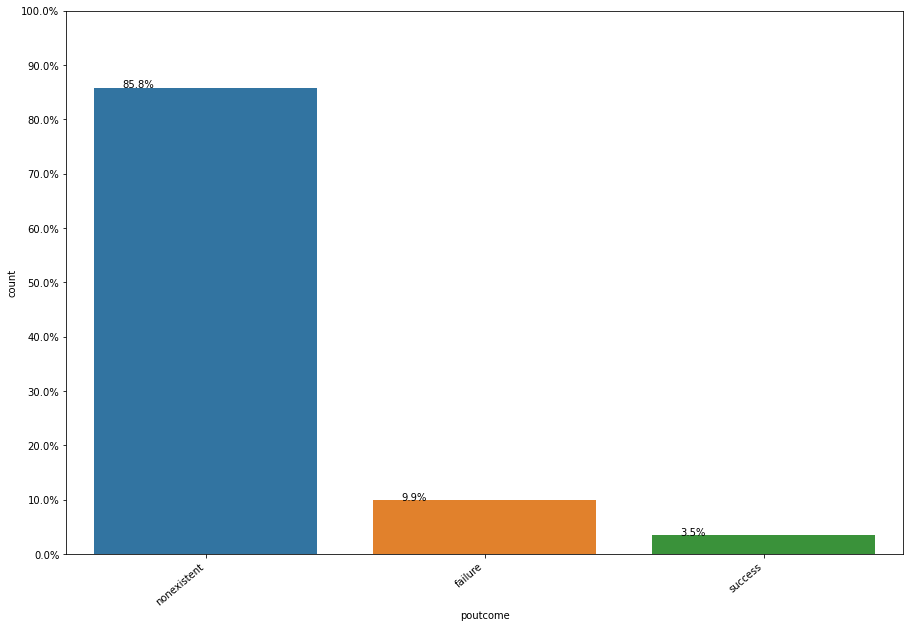

In [56]:
countplot("poutcome",data)

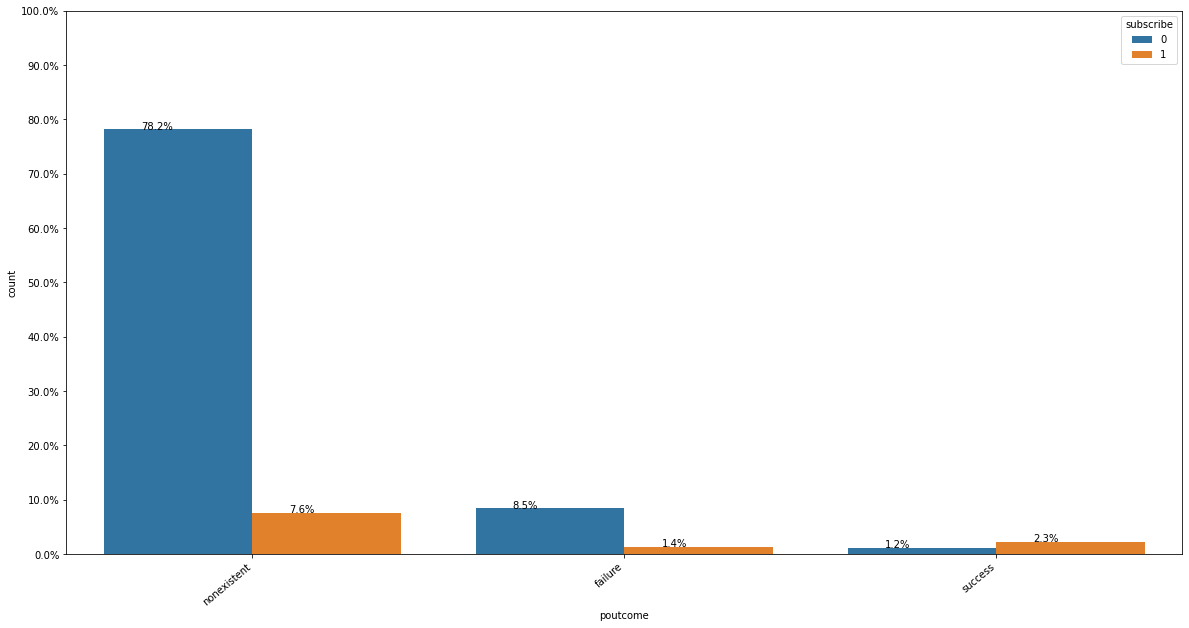

In [57]:
countplot_withY("poutcome",data)

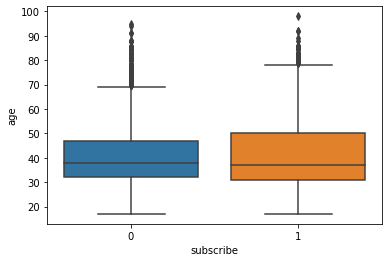

In [58]:
%matplotlib inline
sns.boxplot(data=data, x="subscribe", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of
around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for
which customer will subscribe and which customer will not.

C:\Users\anoor\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anoor\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



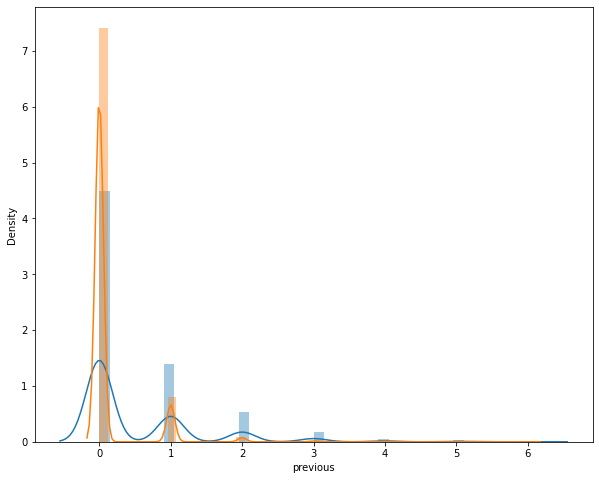

In [59]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["subscribe"]==1]["previous"])
sns.distplot(data[data["subscribe"]==0]["previous"])
plt.show()


The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much
value this individual feature have on the target variable

### Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

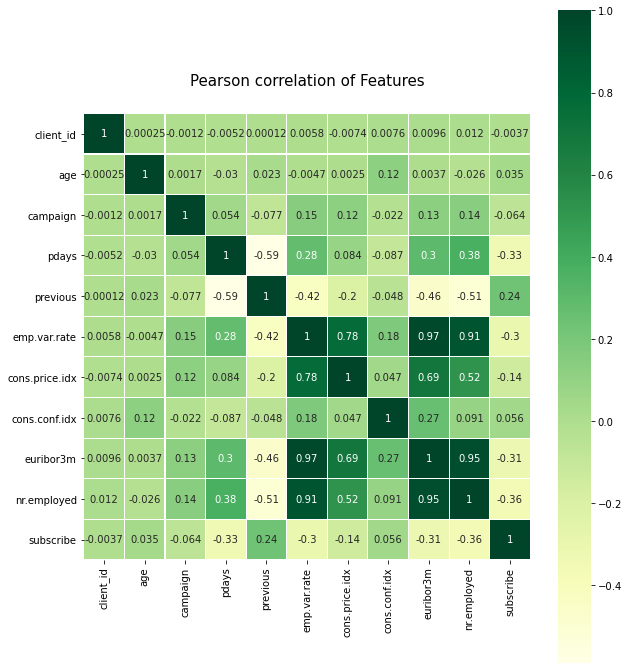

In [60]:

%matplotlib inline
%matplotlib inline
corr = data.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g
nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of
0.97, which is very high compared to the other features that we see in the heatmap.

### Dealing with missing data

In [61]:
#Duplicate data check
data_dup = data[data.duplicated(keep="last")]
data_dup

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe


In [62]:
#fillna with -1
data = data.dropna()

In [63]:
data.head(3)

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0


### Separate inpedendent and target variables

In [64]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["subscribe"]
print("Shape of Y:", data_y.shape)

Shape of X: (16633, 20)
Shape of Y: (16633,)


### Train test Split

In [65]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (10644, 20)
X CV: (2662, 20)
X Test: (3327, 20)
Y Train: (10644,)
Y CV: (2662,)
Y Test: (3327,)


In [66]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

### One Hot Encoding Categorical features

In [67]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [68]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)


In [70]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (10644, 63)
Shape of CV:  (2662, 63)
Shape of test:  (3327, 63)


In [71]:
#exporting encoded files
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

In [72]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## KNN

In [73]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.617243671366498
AUC for k =  3 is 0.6567869456932194
AUC for k =  5 is 0.6830479196784294
AUC for k =  7 is 0.6963062854829511
AUC for k =  9 is 0.7140410935484798
AUC for k =  11 is 0.7198476122222056
AUC for k =  13 is 0.7197983754603979
AUC for k =  15 is 0.7180251681914106


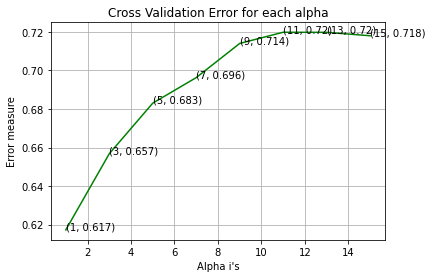

For values of best alpha =  11 The train AUC is: 0.8540248886246173
For values of best alpha =  11 The cross validation AUC is: 0.7198476122222056
For values of best alpha =  11 The test AUC is: 0.6964945121604459


In [74]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
# predict_train = sig_clf.predict_proba(X_train)
# auc_train_knn = roc_auc_score(y_test, predict_train[:,1])
# print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",auc_train_knn)
# predict_cv = sig_clf.predict_proba(X_cv)
# auc_cv_knn = roc_auc_score(y_test, predict_cv[:,1])
# print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_knn)
# predict_test = sig_clf.predict_proba(X_test)
# auc_test_knn = roc_auc_score(y_test, predict_test[:,1])
# print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",auc_test_knn)

predict_y = sig_clf.predict_proba(X_train)
auc_train_knn = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha for knn = ', alpha[best_alpha], "The train AUC is:",auc_train_knn)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_knn = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha for knn = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_knn)
predict_y = sig_clf.predict_proba(X_test)
auc_test_knn = roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha for knn = ', alpha[best_alpha], "The test AUC is:",auc_test_knn)

In [75]:
auc_train_knn

0.8540248886246173

In [76]:
auc_cv_knn

0.7198476122222056

In [77]:
auc_test_knn

0.6964945121604459

In [78]:
#Create a dataframe with results
knn_val=pd.DataFrame([[auc_train_knn,auc_cv_knn,auc_test_knn]],columns=['auc_train_knn','auc_cv_knn','auc_test_knn'])
knn_val

,auc_train_knn,auc_cv_knn,auc_test_knn
0,0.854025,0.719848,0.696495


## Logistic

AUC for k =  1e-05 is 0.7588027807828919
AUC for k =  0.0001 is 0.7789023211030127
AUC for k =  0.001 is 0.7771831375032312
AUC for k =  0.01 is 0.7776700343699952
AUC for k =  0.1 is 0.7771735636884352
AUC for k =  1 is 0.7784263657388728
AUC for k =  10 is 0.7772665664607383
AUC for k =  100 is 0.7770518394717443
AUC for k =  1000 is 0.7770504717839162


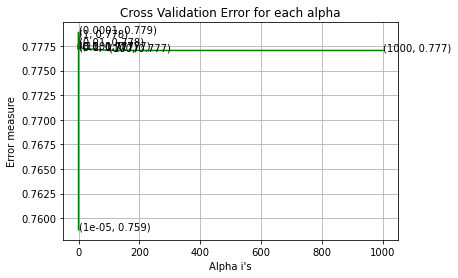

For values of best alpha =  0.0001 The train AUC is: 0.7540178425524422
For values of best alpha =  0.0001 The cross validation AUC is: 0.7789023211030127
For values of best alpha =  0.0001 The test AUC is: 0.7706045153830113


In [79]:
# %matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
auc_train_logistic = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha in logistic model = ', alpha[best_alpha], "The train AUC is:",auc_train_logistic)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_logistic = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha in logistic model = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_logistic)
predict_y = sig_clf.predict_proba(X_test)
auc_test_logistic = roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha in logistic model = ', alpha[best_alpha], "The test AUC is:", auc_test_logistic)

In [80]:
#Create a dataframe with results
Logistic_val=pd.DataFrame([[auc_train_logistic,auc_cv_logistic,auc_test_logistic]],columns=['auc_train_logistic','auc_cv_logistic','auc_test_logistic'])
Logistic_val

,auc_train_logistic,auc_cv_logistic,auc_test_logistic
0,0.754018,0.778902,0.770605


## RBF Kernal SVM

AUC for C =  1e-05 is 0.511312829869208
AUC for C =  0.0001 is 0.511312829869208
AUC for C =  0.001 is 0.511312829869208
AUC for C =  0.01 is 0.511312829869208
AUC for C =  0.1 is 0.5309555624547808
AUC for C =  1 is 0.7062329637384926
AUC for C =  10 is 0.7561535694600778
AUC for C =  100 is 0.7623738137017702
AUC for C =  1000 is 0.7599707861879941


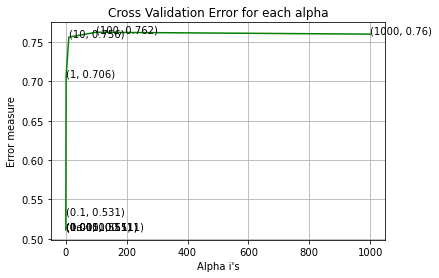

For values of best alpha for SVM=  100 The train AUC is: 0.7564267600703377
For values of best alpha for SVM =  100 The cross validation AUC is: 0.7623738137017702
For values of best alpha for SVM =  100 The test AUC is: 0.7443422894509526


In [89]:
%matplotlib inline
from sklearn.svm import SVC

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    SVM = SVC(C=i,class_weight='balanced')
    SVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for C = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

SVM = SVC(C=alpha[best_alpha], class_weight='balanced')
SVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
auc_train_RBF = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha for SVM= ', alpha[best_alpha], "The train AUC is:",auc_train_RBF)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_RBF = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha for SVM = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_RBF)
predict_y = sig_clf.predict_proba(X_test)
auc_test_RBF= roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha for SVM = ', alpha[best_alpha], "The test AUC is:",auc_test_RBF)

In [90]:
#Create a dataframe with results
RBF_val=pd.DataFrame([[auc_train_RBF,auc_cv_RBF,auc_test_RBF]],columns=['auc_train_RBF','auc_cv_RBF','auc_test_RBF'])
RBF_val

,auc_train_RBF,auc_cv_RBF,auc_test_RBF
0,0.756427,0.762374,0.744342


## Random Forest

AUC for number of estimators =  10 is 0.9628987322901521
AUC for number of estimators =  50 is 0.9697364875861815
AUC for number of estimators =  100 is 0.9684727440331199
AUC for number of estimators =  500 is 0.9692557453146434
AUC for number of estimators =  1000 is 0.9697358037422674
AUC for number of estimators =  2000 is 0.969538856695037
AUC for number of estimators =  3000 is 0.9695497981976609


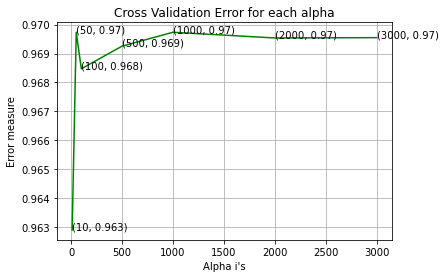

For values of best alpha for random forest=  50 The train AUC is: 0.9999887496788853
For values of best alpha for random forest =  50 The cross validation AUC is: 0.9697364875861815
For values of best alpha for random forest =  50 The test AUC is: 0.76874826832497


In [91]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
auc_train_RF = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha for random forest= ', alpha[best_alpha], "The train AUC is:",auc_train_RF)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_RF = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha for random forest = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_RF)
predict_y = sig_clf.predict_proba(X_test)
auc_test_RF = roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha for random forest = ', alpha[best_alpha], "The test AUC is:",auc_test_RF)

In [92]:
#Create a dataframe with results
RandomForest_val=pd.DataFrame([[auc_train_RF,auc_cv_RF,auc_test_RF]],columns=['auc_train_RF','auc_cv_RF','auc_test_RF'])
RandomForest_val

,auc_train_RF,auc_cv_RF,auc_test_RF
0,0.999989,0.969736,0.768748


In [94]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

### GradientBoost

AUC for number of estimators =  10 is 0.795994315889387
AUC for number of estimators =  50 is 0.7995338919882213
AUC for number of estimators =  100 is 0.8031972438354891
AUC for number of estimators =  500 is 0.8151939176186914
AUC for number of estimators =  1000 is 0.8216261534737219
AUC for number of estimators =  2000 is 0.8283059408256183
AUC for number of estimators =  3000 is 0.8315459932901235


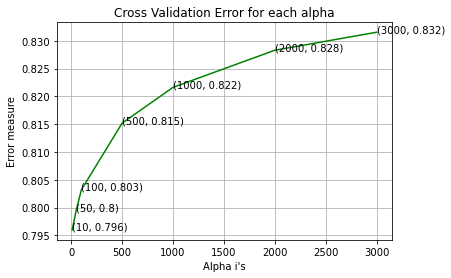

For values of best alpha =  3000 The train AUC is: 0.7678181624731801
For values of best alpha =  3000 The cross validation AUC is: 0.780335657946745
For values of best alpha =  3000 The test AUC is: 0.7563087298152336


In [95]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=GradientBoostingClassifier(n_estimators=i,random_state=42,learning_rate=1.0, max_depth=1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=GradientBoostingClassifier(n_estimators=i,random_state=42,learning_rate=1.0, max_depth=1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
auc_train_GBoost = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",auc_train_GBoost)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_GBoost = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",auc_cv_GBoost)
predict_y = sig_clf.predict_proba(X_test)
auc_test_GBoost = roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",auc_test_GBoost)

## XGBoost

In [ ]:
#!pip install xgboost

[21:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

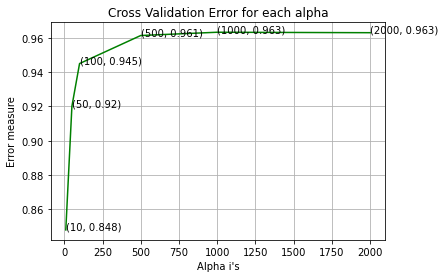

[21:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [104]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="exact")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="exact")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
auc_train_GBoost = roc_auc_score(y_train, predict_y[:,1])
print ('For values of best alpha for XGBoost = ', alpha[best_alpha], "The train AUC of XGBoost is:" ,auc_train_GBoost)
predict_y = sig_clf.predict_proba(X_cv)
auc_cv_GBoost = roc_auc_score(y_cv, predict_y[:,1])
print('For values of best alpha for XGBoost = ', alpha[best_alpha], "The cross validation AUC of XGBoost is:" ,auc_cv_GBoost)
predict_y = sig_clf.predict_proba(X_test)
auc_test_GBoost = roc_auc_score(y_test, predict_y[:,1])
print('For values of best alpha for XGBoost = ', alpha[best_alpha], "The test AUC of XGBoost is:", auc_test_GBoost)

In [105]:
#Create a dataframe with results
XGBoost_val=pd.DataFrame([[auc_train_GBoost,auc_cv_GBoost,auc_test_GBoost]],columns=['auc_train_GBoost','auc_cv_GBoost','auc_test_GBoost'])
XGBoost_val

,auc_train_GBoost,auc_cv_GBoost,auc_test_GBoost
0,0.816295,0.820314,0.785385


## Compare AUC of all models

In [107]:
metric_evals = pd.concat([XGBoost_val,knn_val,Logistic_val,RBF_val,RandomForest_val], axis=1)
metric_evals

,auc_train_GBoost,auc_cv_GBoost,auc_test_GBoost,auc_train_knn,auc_cv_knn,auc_test_knn,auc_train_logistic,auc_cv_logistic,auc_test_logistic,auc_train_RBF,auc_cv_RBF,auc_test_RBF,auc_train_RF,auc_cv_RF,auc_test_RF
0,0.816295,0.820314,0.785385,0.854025,0.719848,0.696495,0.754018,0.778902,0.770605,0.756427,0.762374,0.744342,0.999989,0.969736,0.768748


## XGBoost with RandomizedSearchCV hyper parameter tuning

In [83]:
# For RandomizedSearchCV I will use 80% of data for train and
# 20% of data for test. RandomizedSearchCV will internally split train data for Cross validation.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Train:", y_test.shape)

X Train: (13306, 20)
X Test: (3327, 20)
Y Train: (13306,)
Y Train: (3327,)


In [84]:
OneHotEncoder(categorical_cols, X_train, X_test)
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (13306, 63)
Shape of test:  (3327, 63)


In [85]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [86]:
x_cfl=XGBClassifier(tree_method='exact', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[14:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10; 1/20] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1; total time=  16.5s
[CV 2/10; 1/20] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[14:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd lik

In [87]:
x_cfl=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1, \
                    colsample_bytree=0.5,subsample=1,tree_method='exact', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 200 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 200 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

[14:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

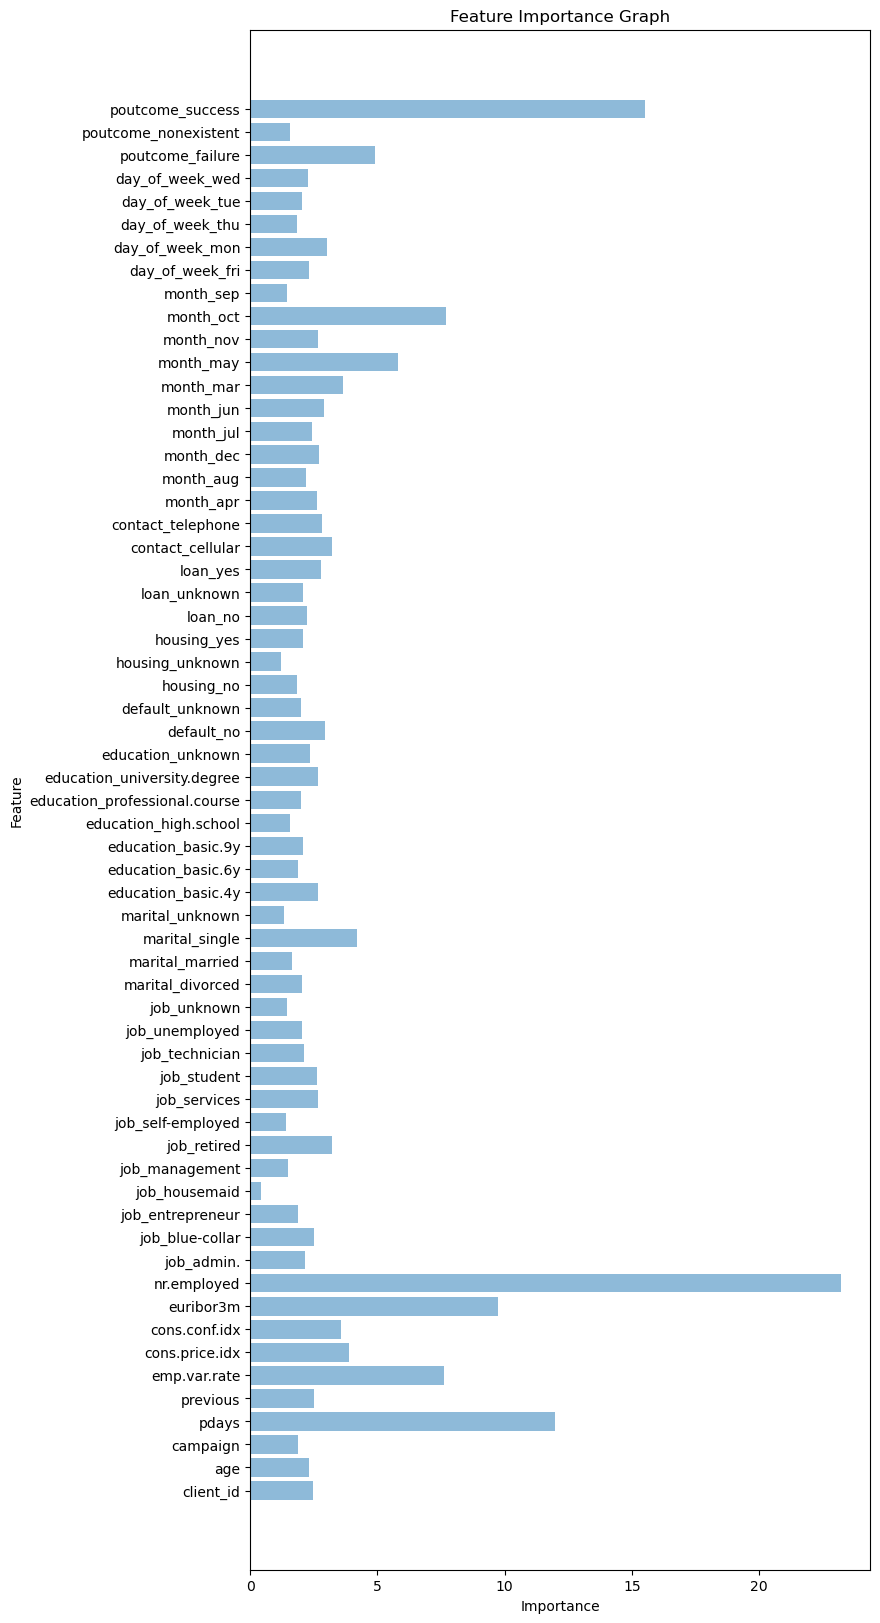

In [88]:
import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

## MLP Classifier

AUC for number of estimators =  10 is 0.6360346212891942
AUC for number of estimators =  50 is 0.7393679968367479
AUC for number of estimators =  100 is 0.7667650257999243
AUC for number of estimators =  500 is 0.7198467342375618
AUC for number of estimators =  1000 is 0.6183046487706516
AUC for number of estimators =  2000 is 0.7300147327628785


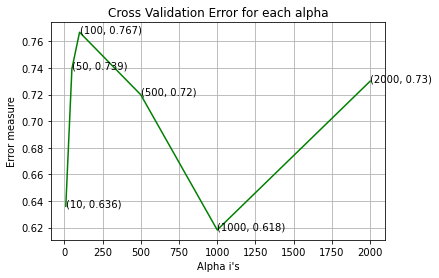

For values of best alpha =  100 The train AUC is: 0.7576511251663629
For values of best alpha =  100 The cross validation AUC is: 0.7676543387072037
For values of best alpha =  100 The test AUC is: 0.7368824125224953


In [189]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=100)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha is")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=100)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))